# WeatherPy

---

## Generate Random Geographic Coordinates and a List of More than 500 Cities

In [1]:
# Dependencies and Setup

import string
from pathlib import Path
from datetime import datetime

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List Using the "citipy" Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities' names
cities = []

# Ranges of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
# Python "zip()" will combine two lists into one list of tuples
# We want at least 500 cities but need to account for duplicates
# or no city present in the initial set of lat/longs requested

lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print city count to confirm there are a sufficient number of cities

print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the random cities list generated

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Save config information.
# Get data in Farenheit for U.S. audience
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to display to create a log
print("-----------------------------")
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in the list to fetch weather data
# The default "start" value for enumerate() is zero, appropriate
# for iterating through an array

for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    # There is also a limit on requests per 
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL for each city
    # if no mode is specified, the default returned is json
    city_url = query_url + city
    
    # Print the city, record, and set numbers to keep user informed
    # of progress as the data is being retrieved
    
    print(f"Processing Record {record_count} of Set {set_count} for city {city}")
    
    # increment the record count
    record_count += 1

    # Run an API request for the city
    try:
        # Parse the JSON and retrieve data
        
        city_weather = requests.get(city_url).json()
    
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = (city_weather['coord']['lat'])
        city_lng = (city_weather['coord']['lon'])
        city_max_temp = (city_weather['main']["temp_max"])
        city_humidity = (city_weather['main']["humidity"])
        city_clouds = (city_weather['clouds']["all"])
        city_wind = (city_weather['wind']["speed"])
        city_country = (city_weather['sys']["country"])
        city_date = (city_weather['dt'])

        # Append the city information to the city_data list
        # Appending in this way will add
        # the information for this city as one entry
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                         })

    # If an error occurs, skip this city
    except:

        print("City not found.  Skipping it...")
        pass
              
# Indicate that data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


-----------------------------
Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 for city taiohae
City not found.  Skipping it...
Processing Record 2 of Set 1 for city adamstown
Processing Record 3 of Set 1 for city nagqu
Processing Record 4 of Set 1 for city puerto natales
Processing Record 5 of Set 1 for city gizo
Processing Record 6 of Set 1 for city novyy urengoy
Processing Record 7 of Set 1 for city angra do heroismo
Processing Record 8 of Set 1 for city port-aux-francais
Processing Record 9 of Set 1 for city anadyr
Processing Record 10 of Set 1 for city puerto ayora
Processing Record 11 of Set 1 for city grytviken
Processing Record 12 of Set 1 for city pudasjarvi
Processing Record 13 of Set 1 for city ribeira grande
Processing Record 14 of Set 1 for city edinburgh of the seven seas
Processing Record 15 of Set 1 for city paita
Processing Record 16 of Set 1 for city uturoa
Processing Record 17 of Set 1 for city talnakh
Processing Record 18 of S

Processing Record 13 of Set 4 for city bubaque
Processing Record 14 of Set 4 for city juneau
Processing Record 15 of Set 4 for city nadi
Processing Record 16 of Set 4 for city atafu village
Processing Record 17 of Set 4 for city lihue
Processing Record 18 of Set 4 for city pugachev
Processing Record 19 of Set 4 for city sitka
Processing Record 20 of Set 4 for city tadine
Processing Record 21 of Set 4 for city mpika
Processing Record 22 of Set 4 for city gaalkacyo
Processing Record 23 of Set 4 for city arraial do cabo
Processing Record 24 of Set 4 for city constantia
Processing Record 25 of Set 4 for city ras gharib
City not found.  Skipping it...
Processing Record 26 of Set 4 for city palu
Processing Record 27 of Set 4 for city terekeka
City not found.  Skipping it...
Processing Record 28 of Set 4 for city olonkinbyen
Processing Record 29 of Set 4 for city wanning
Processing Record 30 of Set 4 for city porto novo
Processing Record 31 of Set 4 for city bhamo
Processing Record 32 of Set 

Processing Record 22 of Set 7 for city ocos
Processing Record 23 of Set 7 for city trujillo
Processing Record 24 of Set 7 for city mossel bay
Processing Record 25 of Set 7 for city ierapetra
Processing Record 26 of Set 7 for city bridgetown
Processing Record 27 of Set 7 for city shush
Processing Record 28 of Set 7 for city sijunjung
Processing Record 29 of Set 7 for city roma
Processing Record 30 of Set 7 for city khanty-mansiysk
Processing Record 31 of Set 7 for city shofirkon shahri
City not found.  Skipping it...
Processing Record 32 of Set 7 for city mokwa
Processing Record 33 of Set 7 for city haiku-pauwela
Processing Record 34 of Set 7 for city namibe
Processing Record 35 of Set 7 for city port alfred
Processing Record 36 of Set 7 for city nha trang
Processing Record 37 of Set 7 for city taitung city
Processing Record 38 of Set 7 for city sao gabriel da cachoeira
Processing Record 39 of Set 7 for city floro
Processing Record 40 of Set 7 for city hiriyur
Processing Record 41 of Se

Processing Record 36 of Set 10 for city soller
Processing Record 37 of Set 10 for city dalcahue
Processing Record 38 of Set 10 for city iacu
Processing Record 39 of Set 10 for city cargados carajos
City not found.  Skipping it...
Processing Record 40 of Set 10 for city polyarnyy
Processing Record 41 of Set 10 for city vrangel'
Processing Record 42 of Set 10 for city klaksvik
Processing Record 43 of Set 10 for city kuala pilah
Processing Record 44 of Set 10 for city magistral'nyy
Processing Record 45 of Set 10 for city san luis de la loma
Processing Record 46 of Set 10 for city oranjemund
Processing Record 47 of Set 10 for city barra de santo antonio
Processing Record 48 of Set 10 for city turiacu
Processing Record 49 of Set 10 for city onega
Processing Record 0 of Set 11 for city okhotsk
Processing Record 1 of Set 11 for city micheweni
Processing Record 2 of Set 11 for city mcdonough
Processing Record 3 of Set 11 for city makoua
Processing Record 4 of Set 11 for city whitefish
Processi

In [5]:
city_data

[{'City': 'adamstown',
  'Lat': -25.066,
  'Lng': -130.1015,
  'Max Temp': 71.06,
  'Humidity': 53,
  'Cloudiness': 96,
  'Wind Speed': 11.07,
  'Country': 'PN',
  'Date': 1683639673},
 {'City': 'nagqu',
  'Lat': 31.5,
  'Lng': 92,
  'Max Temp': 37.06,
  'Humidity': 33,
  'Cloudiness': 100,
  'Wind Speed': 3.18,
  'Country': 'CN',
  'Date': 1683639673},
 {'City': 'puerto natales',
  'Lat': -51.7236,
  'Lng': -72.4875,
  'Max Temp': 39.87,
  'Humidity': 88,
  'Cloudiness': 24,
  'Wind Speed': 3.02,
  'Country': 'CL',
  'Date': 1683639673},
 {'City': 'gizo',
  'Lat': -8.103,
  'Lng': 156.8419,
  'Max Temp': 82.94,
  'Humidity': 79,
  'Cloudiness': 96,
  'Wind Speed': 14.74,
  'Country': 'SB',
  'Date': 1683639673},
 {'City': 'novyy urengoy',
  'Lat': 66.0833,
  'Lng': 76.6333,
  'Max Temp': 23.02,
  'Humidity': 97,
  'Cloudiness': 97,
  'Wind Speed': 6.98,
  'Country': 'RU',
  'Date': 1683639673},
 {'City': 'angra do heroismo',
  'Lat': 38.65,
  'Lng': -27.2167,
  'Max Temp': 65.12,
  'H

In [6]:
# Create a Pandas DataFrame with the cities weather data 

city_data_df = pd.DataFrame(city_data)


# Display record counts
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [7]:
# Display sample of the city data

city_data_df.head(20)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,71.06,53,96,11.07,PN,1683639673
1,nagqu,31.5000,92.0000,37.06,33,100,3.18,CN,1683639673
2,puerto natales,-51.7236,-72.4875,39.87,88,24,3.02,CL,1683639673
3,gizo,-8.1030,156.8419,82.94,79,96,14.74,SB,1683639673
4,novyy urengoy,66.0833,76.6333,23.02,97,97,6.98,RU,1683639673
5,angra do heroismo,38.6500,-27.2167,65.12,97,75,5.01,PT,1683639673
6,port-aux-francais,-49.3500,70.2167,42.06,92,100,10.85,TF,1683639673
7,anadyr,64.7500,177.4833,12.70,92,0,6.71,RU,1683639674
8,puerto ayora,-0.7393,-90.3518,79.56,96,21,5.01,EC,1683639674
9,grytviken,-54.2811,-36.5092,34.09,90,100,4.72,GS,1683639674


In [8]:
# Export the city data into a csv file
# Create a unique index for the city

city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data with its added City_ID indext

city_data_in_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head(20)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,71.06,53,96,11.07,PN,1683639673
1,nagqu,31.5000,92.0000,37.06,33,100,3.18,CN,1683639673
2,puerto natales,-51.7236,-72.4875,39.87,88,24,3.02,CL,1683639673
3,gizo,-8.1030,156.8419,82.94,79,96,14.74,SB,1683639673
4,novyy urengoy,66.0833,76.6333,23.02,97,97,6.98,RU,1683639673
5,angra do heroismo,38.6500,-27.2167,65.12,97,75,5.01,PT,1683639673
6,port-aux-francais,-49.3500,70.2167,42.06,92,100,10.85,TF,1683639673
7,anadyr,64.7500,177.4833,12.70,92,0,6.71,RU,1683639674
8,puerto ayora,-0.7393,-90.3518,79.56,96,21,5.01,EC,1683639674
9,grytviken,-54.2811,-36.5092,34.09,90,100,4.72,GS,1683639674


### Create the Requested Scatter Plots

#### Latitude vs. Temperature

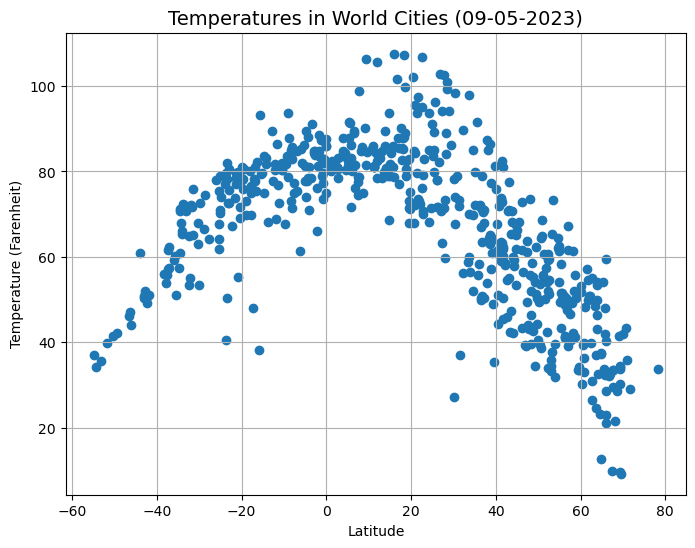

In [16]:
# Build scatter plot for latitude vs. temperature

plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

# get the most recent date for the title
# convert it from Unix format for display

map_date = city_data_df["Date"].max()

map_datetime_obj=datetime.utcfromtimestamp(map_date)
map_date_string=map_datetime_obj.strftime("%d-%m-%Y")

# Include the other requested graph properties
plt.title(f"Temperatures in World Cities ({map_date_string})", fontsize=14)
plt.ylabel("Temperature (Farenheit)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig1_Lat_Humidity.png")

# Show plot
plt.show()


#### Latitude vs. Humidity

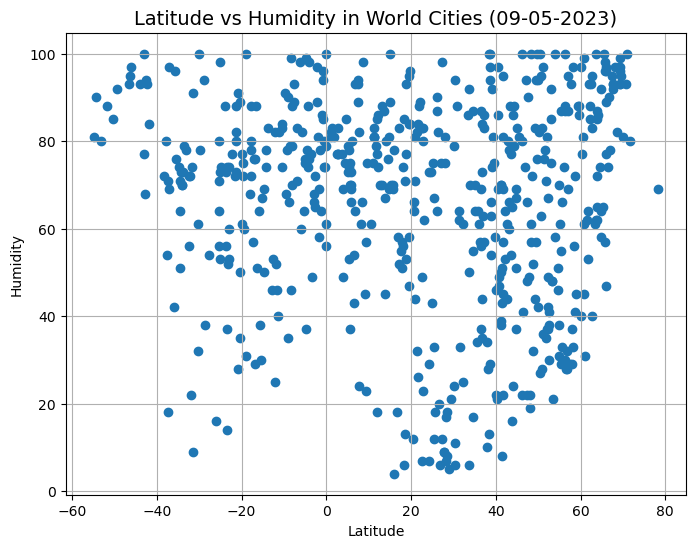

In [15]:
# Build the scatter plots for latitude vs. humidity

plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")

# get the most recent date for the title
# convert it from Unix format for display

map_date = city_data_df["Date"].max()

map_datetime_obj=datetime.utcfromtimestamp(map_date)
map_date_string=map_datetime_obj.strftime("%d-%m-%Y")

# Include the other requested graph properties
plt.title(f"Latitude vs Humidity in World Cities ({map_date_string})", fontsize=14)
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig2_Lat_Humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness

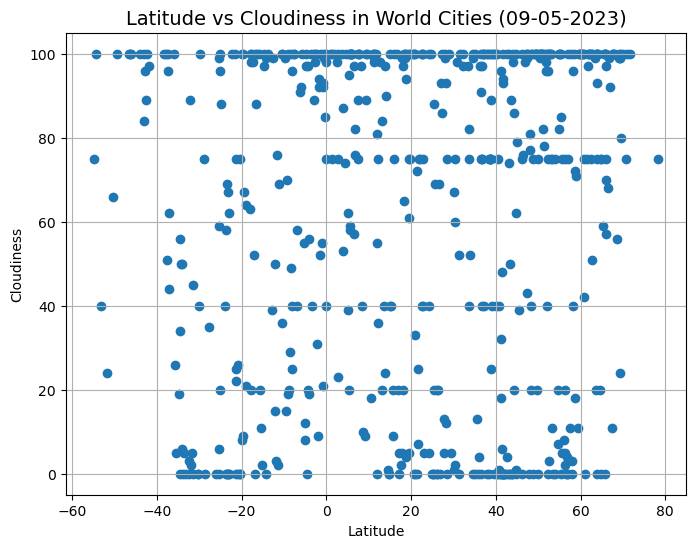

In [14]:
# Build the scatter plots for latitude vs. cloudiness

plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")

# get the most recent date for the title
# convert it from Unix format for display

map_date = city_data_df["Date"].max()

map_datetime_obj=datetime.utcfromtimestamp(map_date)
map_date_string=map_datetime_obj.strftime("%d-%m-%Y")

# Include the other requested graph properties
plt.title(f"Latitude vs Cloudiness in World Cities ({map_date_string})", fontsize=14)
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig3_Lat_Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed

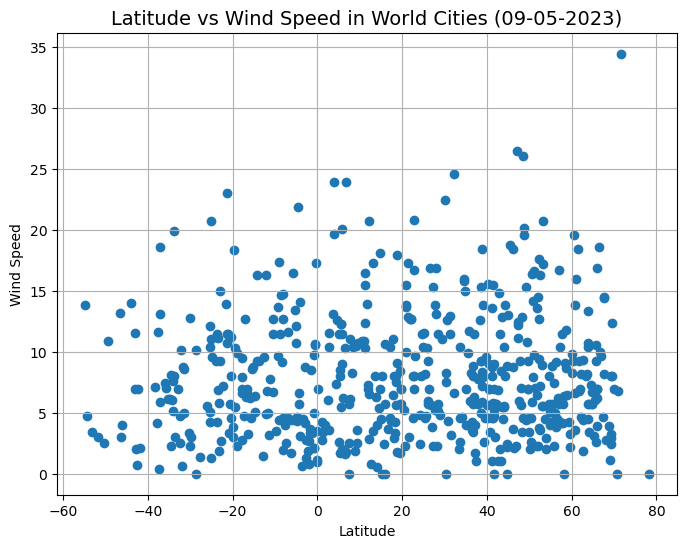

In [17]:
# Build the scatter plots for latitude vs. wind speed

plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")

# get the most recent date for the title
# convert it from Unix format for display

map_date = city_data_df["Date"].max()

map_datetime_obj=datetime.utcfromtimestamp(map_date)
map_date_string=map_datetime_obj.strftime("%d-%m-%Y")

# Include the other requested graph properties
plt.title(f"Latitude vs Wind Speed in World Cities ({map_date_string})", fontsize=14)
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig4_Lat_windspeed.png")

# Show plot
plt.show()

---

## Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots

x_values = []
y_values = []

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

In [20]:
# Create a DataFrame with the northern hemisphere data (Latitude >= 0)

northern_cities_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,nagqu,31.5000,92.0000,37.06,33,100,3.18,CN,1683639673
4,novyy urengoy,66.0833,76.6333,23.02,97,97,6.98,RU,1683639673
5,angra do heroismo,38.6500,-27.2167,65.12,97,75,5.01,PT,1683639673
7,anadyr,64.7500,177.4833,12.70,92,0,6.71,RU,1683639674
10,pudasjarvi,65.3833,26.9167,54.21,65,59,3.06,FI,1683639674


In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)

southern_cities_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,71.06,53,96,11.07,PN,1683639673
2,puerto natales,-51.7236,-72.4875,39.87,88,24,3.02,CL,1683639673
3,gizo,-8.1030,156.8419,82.94,79,96,14.74,SB,1683639673
6,port-aux-francais,-49.3500,70.2167,42.06,92,100,10.85,TF,1683639673
8,puerto ayora,-0.7393,-90.3518,79.56,96,21,5.01,EC,1683639674


###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE